In [1]:
from src.autoencoder import FashionDenoisingAutoEncoder

import torch

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0, 1)
])

dataset = datasets.FashionMNIST('../../data', download=True, train=False,
                                transform=transform)

In [3]:
def add_noise(img: torch.Tensor, noise_std: float = .5) -> torch.Tensor:
    noise = torch.randn_like(img) * noise_std
    return img + noise

In [4]:
model = FashionDenoisingAutoEncoder(784, 128)
model.load_state_dict(
    torch.load('../../models/fashion_denoise_autoencoder174.pth',
               weights_only=True, map_location='cpu'
               )
)

<All keys matched successfully>

In [5]:
def plot_each_class(X: torch.Tensor, y: torch.Tensor, n: int = 10, title: str = '') -> None:
    fig, axes = plt.subplots(10, n, figsize=(n, 10))
    for class_i in range(10):
        digit_indices = (y == class_i).nonzero().flatten()
        for i in range(n):
            axes[class_i, i].imshow(X[digit_indices[i]].reshape(28, 28), cmap='gray')
            axes[class_i, i].axis('off')
            if i == 0:
                axes[class_i, i].set_title(f'{class_i}', rotation='horizontal', x=-.1, y=0.5)
    fig.suptitle(title)
    plt.subplots_adjust(hspace=5e-2, wspace=5e-2)
    plt.show()

In [6]:
X = dataset.data.float() / 255
y = dataset.targets

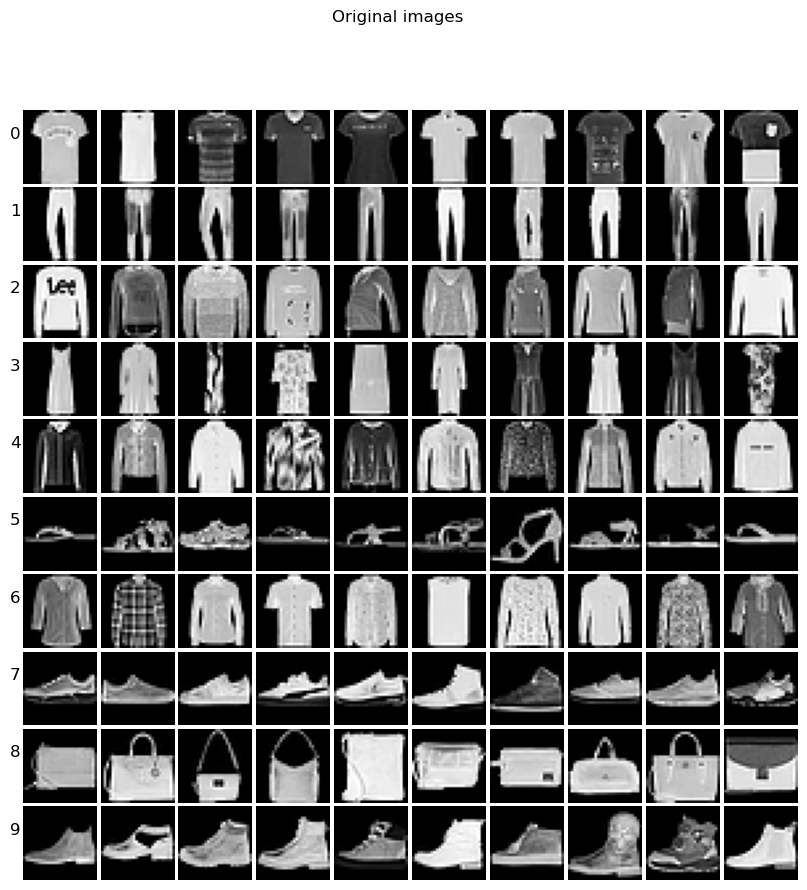

In [7]:
plot_each_class(X, y, title='Original images')

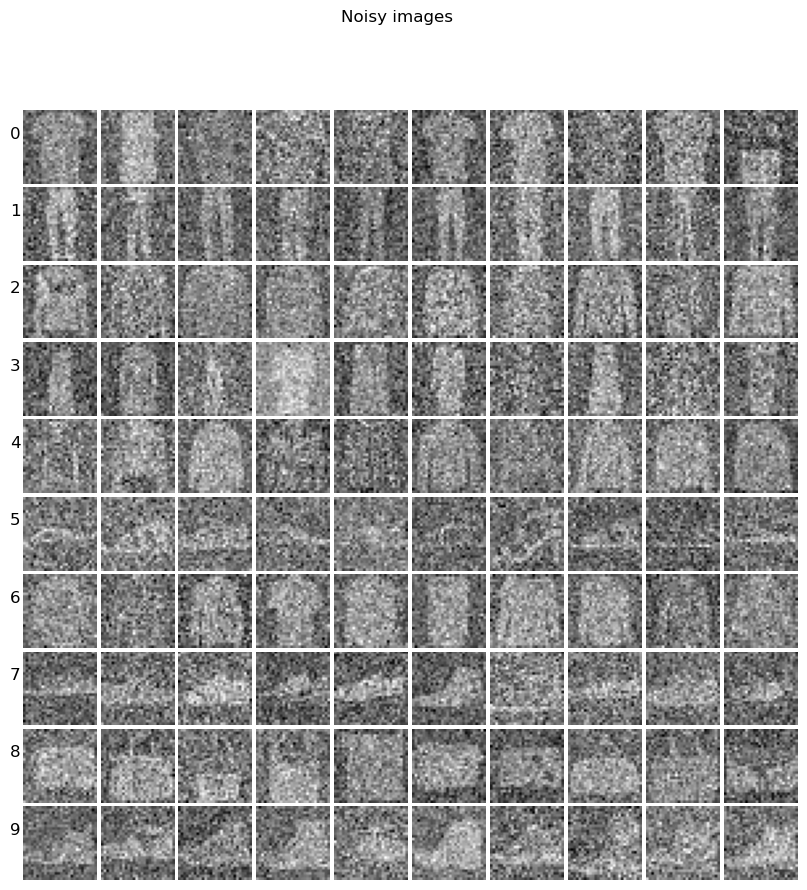

In [8]:
X_noisy = add_noise(X)
plot_each_class(X_noisy, y, title='Noisy images')

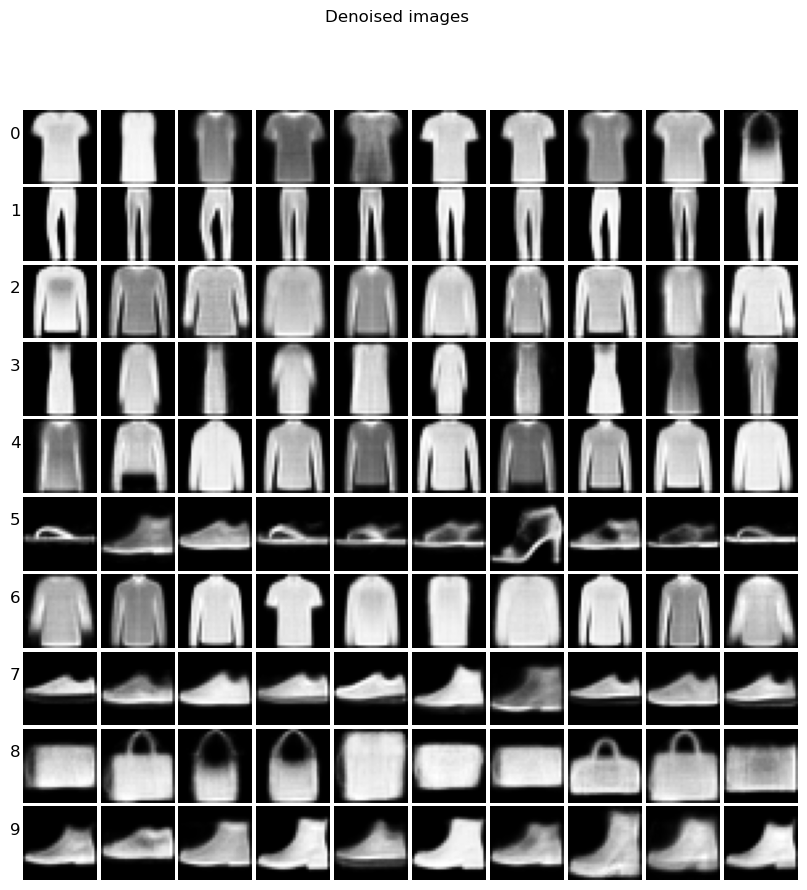

In [9]:
X_denoised = model(X_noisy.view(-1, 784)).detach().numpy().reshape(-1, 28, 28)
plot_each_class(X_denoised, y, title='Denoised images')

In [ ]:
True